# Federated gradient methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NUM_AGENTS = 10
VARS_DIM = 5
SEED = 42

In [2]:
def quadratic_fn(z, Q, r):
    val = 0.5 * z.T @ Q @ z + r.T @ z
    grad = Q @ z + r
    return val, grad

## Incremental gradient algorithm

In [3]:
rng = np.random.default_rng(SEED)
Q_list = [ np.diag( rng.uniform(size=VARS_DIM) ) for _ in range(NUM_AGENTS)] 
r_list = [ rng.normal(size=VARS_DIM) for _ in range(NUM_AGENTS) ]

z0 = rng.random((VARS_DIM,))

Q_all, r_all = np.sum(Q_list, axis=0), np.sum(r_list, axis=0)
optimal_z = -np.linalg.inv(Q_all) @ r_all
optimal_cost, _ = quadratic_fn(optimal_z, Q_all, r_all)

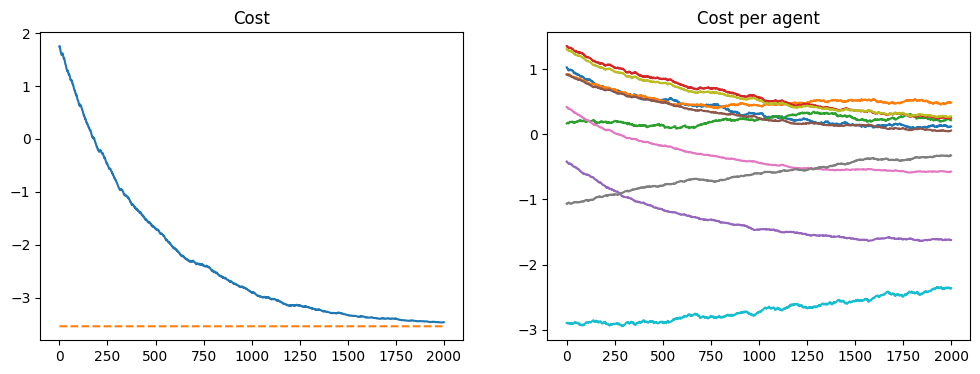

In [4]:
def incremental_gradient_method(z0, Q_list, r_list, alpha, num_iters, seed):
    rng = np.random.default_rng(seed)
    num_agents = len(Q_list)
    z = np.zeros((num_iters+1, z0.shape[0]))
    z[0] = z0

    for k in range(num_iters):
        i = rng.integers(0, num_agents)
        _, grad = quadratic_fn(z[k], Q_list[i], r_list[i])
        direction = -grad
        
        z[k+1] = z[k] + alpha * direction

    return z


history_z_iga = incremental_gradient_method(
    z0.copy(),
    Q_list,
    r_list,
    alpha = 2e-3,
    num_iters = 2000,
    seed = SEED
)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Cost")
plt.plot([ np.sum([ quadratic_fn(z, Q_list[i], r_list[i])[0] for i in range(NUM_AGENTS) ]) for z in history_z_iga ])
plt.plot([optimal_cost]*len(history_z_iga), "--", label="Optimum")

plt.subplot(1, 2, 2)
plt.title("Cost per agent")
for i in range(NUM_AGENTS):
    plt.plot([ quadratic_fn(z, Q_list[i], r_list[i])[0] for z in history_z_iga ], label=f"Cost agent {i}")

plt.show()

## Minibatch gradient algorithm

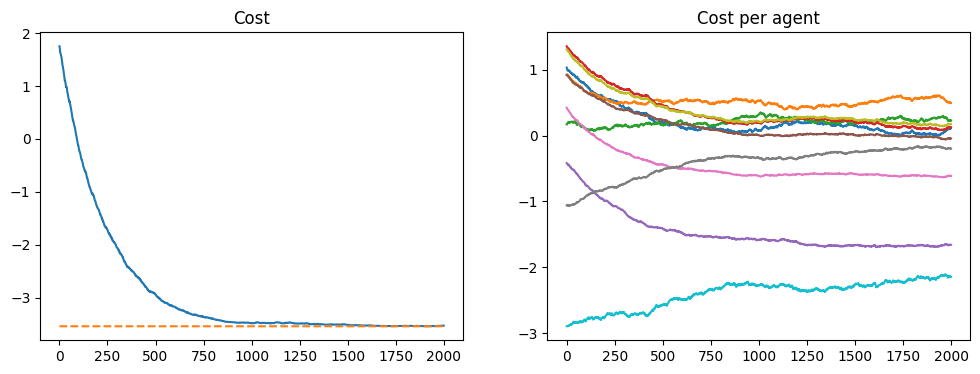

In [5]:
def minibatch_gradient_method(z0, Q_list, r_list, alpha, num_iters, batch_size, seed):
    rng = np.random.default_rng(seed)
    num_agents = len(Q_list)
    z = np.zeros((num_iters+1, z0.shape[0]))
    z[0] = z0

    for k in range(num_iters):
        idxs = rng.choice(range(num_agents), batch_size, replace=False)
        grad_batch = np.array([ quadratic_fn(z[k], Q_list[i], r_list[i])[1] for i in idxs ])
        direction = -np.sum(grad_batch, axis=0)
        
        z[k+1] = z[k] + alpha * direction

    return z


history_z_mga = minibatch_gradient_method(
    z0.copy(),
    Q_list,
    r_list,
    alpha = 2e-3,
    num_iters = 2000,
    batch_size = 2,
    # batch_size = NUM_AGENTS,
    seed = SEED
)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Cost")
plt.plot([ sum(quadratic_fn(z, Q_list[i], r_list[i])[0] for i in range(NUM_AGENTS)) for z in history_z_mga ])
plt.plot([optimal_cost]*len(history_z_mga), "--", label="Optimum")

plt.subplot(1, 2, 2)
plt.title("Cost per agent")
for i in range(NUM_AGENTS):
    plt.plot([ quadratic_fn(z, Q_list[i], r_list[i])[0] for z in history_z_mga ], label=f"Cost agent {i}")

plt.show()